In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Salary_data.csv')
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [3]:
df = df[['Years of Experience','Salary']]
df

,Years of Experience,Salary
0,5.0,90000.0
1,3.0,65000.0
2,15.0,150000.0
3,7.0,60000.0
4,20.0,200000.0
...,...,...
370,8.0,85000.0
371,19.0,170000.0
372,2.0,40000.0
373,7.0,90000.0


Text(0, 0.5, 'Salary')

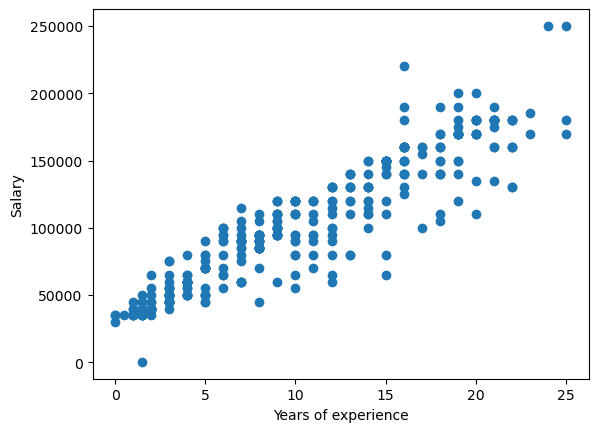

In [6]:
#scatter 
plt.scatter(df['Years of Experience'], df['Salary']) 
plt.xlabel('Years of experience')
plt.ylabel('Salary')

In [7]:
##correlation
df.corr()

,Years of Experience,Salary
Years of Experience,1.000000,0.930338
Salary,0.930338,1.000000


C:\Users\nisch\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


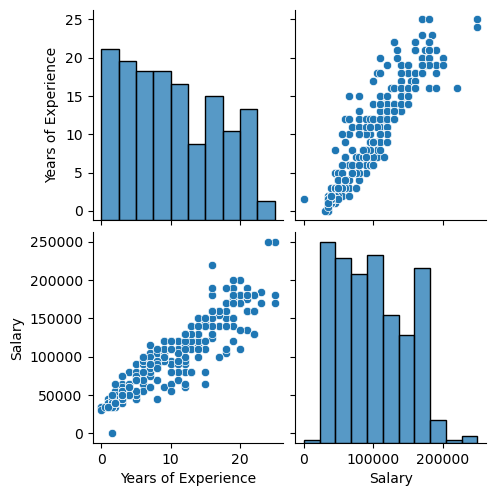

In [8]:
import seaborn as sns
sns.pairplot(df)

In [23]:
df = df.dropna()
df.isna().sum()

Years of Experience    0
Salary                 0
dtype: int64

In [55]:
# dependent and independent feature
X = df[['Years of Experience']]
Y = df[['Salary']]
 


In [56]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state = 1)
  

In [57]:
#standardization
from sklearn.preprocessing import StandardScaler

In [58]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
regression = LinearRegression(n_jobs = -1)

In [61]:
regression.fit(X_train, Y_train)

LinearRegression(n_jobs=-1)

In [62]:
print("coefficient or slop:",regression.coef_)
print("Intercept:", regression.intercept_)

coefficient or slop: [[44255.42456942]]
Intercept: [100269.24290221]


In [67]:
from sklearn.metrics import r2_score

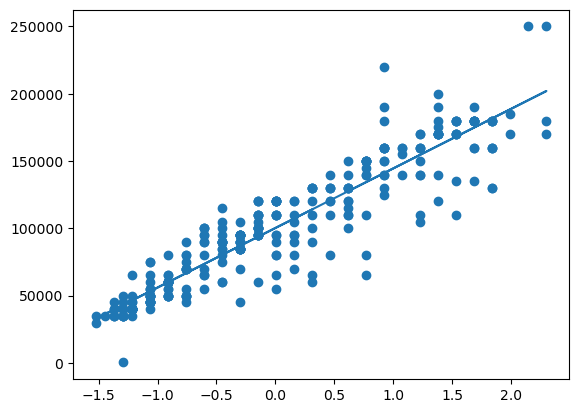

In [63]:
## plot best fit line wrt to training data
plt.scatter(X_train, Y_train)
plt.plot(X_train,regression.predict(X_train))

In [64]:
##prediction for test data
y_pred = regression.predict(X_test)

In [68]:
score = r2_score(Y_test, y_pred)
print(score)

0.8988434983123152


In [65]:
regression.predict(scaler.transform([[2.5]]))

C:\Users\nisch\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[49661.45800407]])

In [33]:
##multiple independent variable
df = pd.read_csv('Salary_data.csv')
df

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0
...,...,...,...,...,...,...
370,35.0,Female,Bachelor's,Senior Marketing Analyst,8.0,85000.0
371,43.0,Male,Master's,Director of Operations,19.0,170000.0
372,29.0,Female,Bachelor's,Junior Project Manager,2.0,40000.0
373,34.0,Male,Bachelor's,Senior Operations Coordinator,7.0,90000.0


In [34]:
# df_mul = df_mul[['Age', 'Education Level', 'Years of Experience', 'Salary']]
# df_mul
df.drop(columns = ['Gender', 'Job Title'], axis =1, inplace = True)

In [35]:
df.head()

,Age,Education Level,Years of Experience,Salary
0,32.0,Bachelor's,5.0,90000.0
1,28.0,Master's,3.0,65000.0
2,45.0,PhD,15.0,150000.0
3,36.0,Bachelor's,7.0,60000.0
4,52.0,Master's,20.0,200000.0


In [36]:

df = df.dropna()
df.isna().sum()


Age                    0
Education Level        0
Years of Experience    0
Salary                 0
dtype: int64

C:\Users\nisch\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


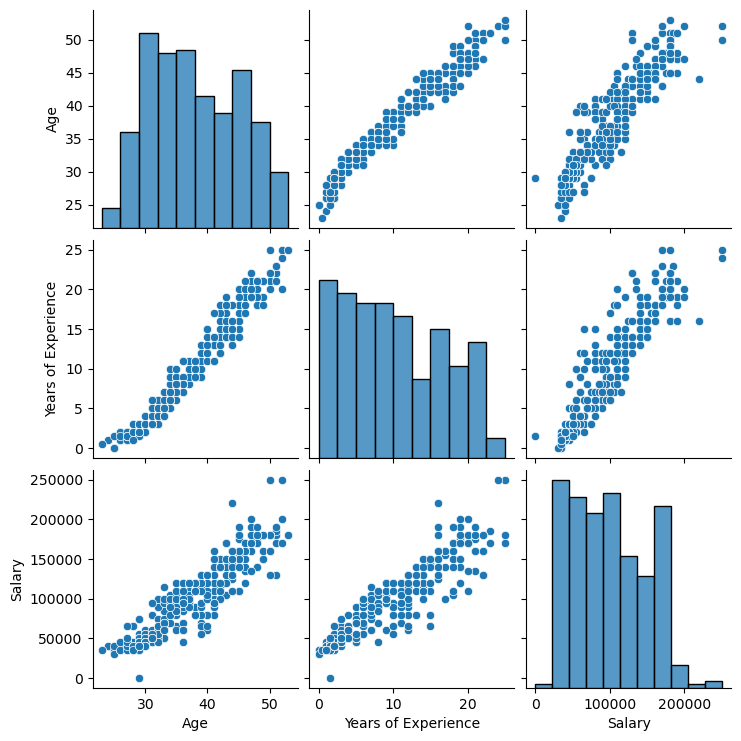

In [37]:
sns.pairplot(df)

In [38]:
df1 = df[['Age', 'Years of Experience', 'Salary']]
df1.corr()

,Age,Years of Experience,Salary
Age,1.000000,0.979128,0.922335
Years of Experience,0.979128,1.000000,0.930338
Salary,0.922335,0.930338,1.000000


In [39]:
df.drop(columns = ['Years of Experience'], axis =1 , inplace = True)
df

C:\Users\nisch\AppData\Local\Temp\ipykernel_18824\2327481135.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns = ['Years of Experience'], axis =1 , inplace = True)


,Age,Education Level,Salary
0,32.0,Bachelor's,90000.0
1,28.0,Master's,65000.0
2,45.0,PhD,150000.0
3,36.0,Bachelor's,60000.0
4,52.0,Master's,200000.0
...,...,...,...
370,35.0,Bachelor's,85000.0
371,43.0,Master's,170000.0
372,29.0,Bachelor's,40000.0
373,34.0,Bachelor's,90000.0


In [40]:
df.head()

,Age,Education Level,Salary
0,32.0,Bachelor's,90000.0
1,28.0,Master's,65000.0
2,45.0,PhD,150000.0
3,36.0,Bachelor's,60000.0
4,52.0,Master's,200000.0


In [43]:
len(set(df['Education Level']))

3

In [52]:
education = pd.get_dummies(df['Education Level'], drop_first = True)
education

KeyError: 'Education Level'

In [70]:
df = pd.concat([df, education], axis = 1)
df.corr()

,Age,Salary,Master's,PhD,Master's,PhD
Age,1.000000,0.922335,0.281897,0.411183,0.281897,0.411183
Salary,0.922335,1.000000,0.362061,0.473073,0.362061,0.473073
Master's,0.281897,0.362061,1.000000,-0.237577,1.000000,-0.237577
PhD,0.411183,0.473073,-0.237577,1.000000,-0.237577,1.000000
Master's,0.281897,0.362061,1.000000,-0.237577,1.000000,-0.237577
PhD,0.411183,0.473073,-0.237577,1.000000,-0.237577,1.000000


In [51]:
df.drop(columns = ['Education Level'], axis = 1, inplace = True)
df

,Age,Salary,Master's,PhD
0,32.0,90000.0,False,False
1,28.0,65000.0,True,False
2,45.0,150000.0,False,True
3,36.0,60000.0,False,False
4,52.0,200000.0,True,False
...,...,...,...,...
370,35.0,85000.0,False,False
371,43.0,170000.0,True,False
372,29.0,40000.0,False,False
373,34.0,90000.0,False,False


In [55]:
X = df[['Age', "Master's", "PhD"]]
Y = df['Salary']

In [56]:
X


,Age,Master's,PhD
0,32.0,False,False
1,28.0,True,False
2,45.0,False,True
3,36.0,False,False
4,52.0,True,False
...,...,...,...
370,35.0,False,False
371,43.0,True,False
372,29.0,False,False
373,34.0,False,False


In [57]:
Y


0       90000.0
1       65000.0
2      150000.0
3       60000.0
4      200000.0
         ...   
370     85000.0
371    170000.0
372     40000.0
373     90000.0
374    150000.0
Name: Salary, Length: 373, dtype: float64

In [58]:
from sklearn.model_selection import train_test_split


In [61]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 23) 

<Axes: xlabel='Age', ylabel='Salary'>

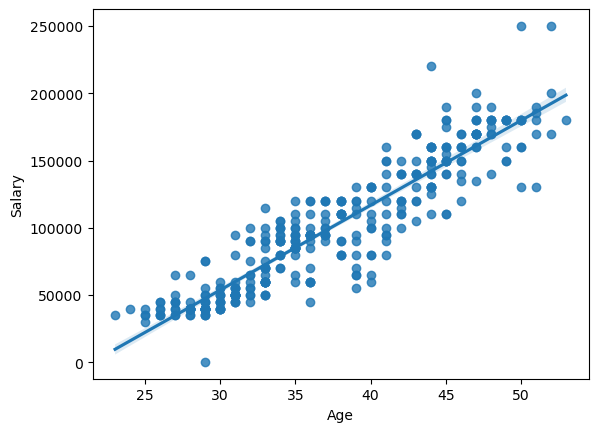

In [73]:
sns.regplot( x= "Age", y= 'Salary', data = df)

In [71]:
#standardizarion
from sklearn.preprocessing import StandardScaler


In [74]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [77]:
X_test

array([[-0.37340007,  1.67943825, -0.4162071 ],
       [-1.36817982, -0.5954372 , -0.4162071 ],
       [ 0.62137968,  1.67943825, -0.4162071 ],
       [-0.23128868, -0.5954372 , -0.4162071 ],
       [ 1.04771386, -0.5954372 ,  2.40265005],
       [-0.23128868, -0.5954372 , -0.4162071 ],
       [-0.51551146, -0.5954372 , -0.4162071 ],
       [ 0.33715689,  1.67943825, -0.4162071 ],
       [ 0.62137968, -0.5954372 ,  2.40265005],
       [-0.65762285, -0.5954372 , -0.4162071 ],
       [-1.22606842, -0.5954372 , -0.4162071 ],
       [-1.22606842, -0.5954372 , -0.4162071 ],
       [ 0.90560246, -0.5954372 , -0.4162071 ],
       [ 0.47926829, -0.5954372 ,  2.40265005],
       [-1.36817982, -0.5954372 , -0.4162071 ],
       [-1.22606842, -0.5954372 , -0.4162071 ],
       [-1.51029121, -0.5954372 , -0.4162071 ],
       [ 0.47926829,  1.67943825, -0.4162071 ],
       [-0.51551146, -0.5954372 , -0.4162071 ],
       [-1.22606842, -0.5954372 , -0.4162071 ],
       [ 0.1950455 , -0.5954372 , -0.416

In [86]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()
regression.fit(X_train,Y_train)

LinearRegression()

In [87]:
print("coefficient or slop:",regression.coef_)
print("Intercept:", regression.intercept_)

coefficient or slop: [38714.3931044   8600.08716888  9358.18466783]
Intercept: 102063.75838926175


In [88]:
#cross validation
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression,X_train, Y_train, scoring = 'neg_mean_squared_error',cv=3)

In [89]:
np.mean(validation_score)

-258760113.1831009

In [90]:
##prediction
y_pred = regression.predict(X_test)
y_pred

array([ 98156.1738016 ,  40079.75248969, 136668.46801689,  84093.80302146,
       159988.99561019,  84093.80302146,  73090.29038852, 125664.95538395,
       143483.72666078,  67588.53407205,  45581.50880616,  45581.50880616,
       128107.85355322, 137981.9703443 ,  40079.75248969,  45581.50880616,
        34577.99617322, 131166.71170042,  73090.29038852,  45581.50880616,
       100599.07197087, 175180.76223219,  89595.55933793, 166620.14776852,
       103657.93011807, 158675.49328278,  78592.04670499,  23574.48354028,
        43138.61063689,  84093.80302146, 175180.76223219, 111602.58460381,
        29076.23985675, 109159.68643454, 159988.99561019,  95097.3156544 ,
        40079.75248969, 161118.39145205, 164177.24959925,  67588.53407205,
        92654.41748513, 111602.58460381,  73090.29038852, 139111.36618616,
       159988.99561019, 125664.95538395,  95097.3156544 ,  78592.04670499,
        23574.48354028, 164177.24959925,  76149.14853572, 159988.99561019,
        18072.72722381, 1

In [91]:
from sklearn.metrics import r2_score
score = r2_score(Y_test, y_pred)
print(score)

0.8575324569004179


# ASUMPTIONS to check how your model is performining

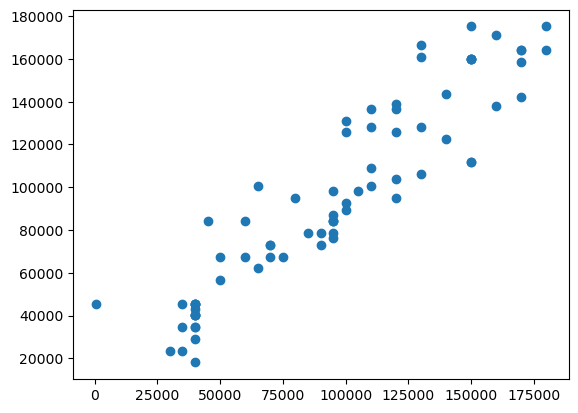

In [92]:
plt.scatter(Y_test, y_pred)
#the plot should be linear

In [93]:
residuals = Y_test - y_pred
print(residuals)

101    -3156.173802
140      -79.752490
74    -16668.468017
334    10906.196979
252    -9988.995610
           ...     
355    23899.171713
186     7847.338831
342    -6585.021439
133   -10992.508243
107   -24093.803021
Name: Salary, Length: 75, dtype: float64


C:\Users\nisch\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


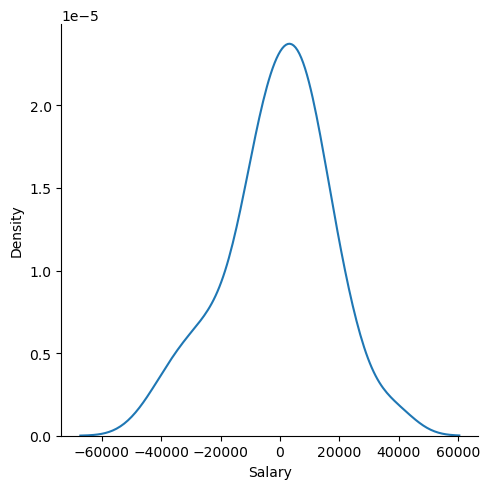

In [94]:
# plot the residuals
sns.displot(residuals, kind='kde')

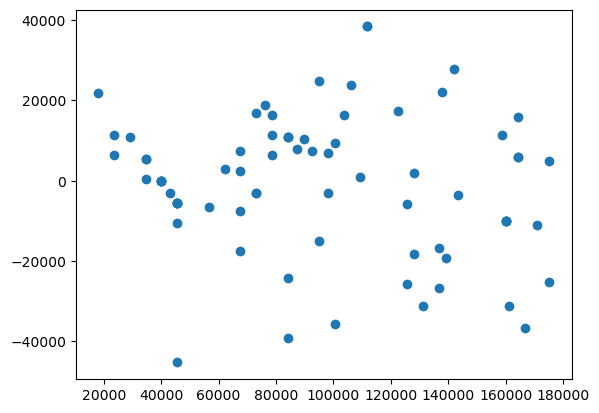

In [95]:
##scatter plot with respect to prediction and residuals
plt.scatter(y_pred, residuals)
#the data should be uniformly distributed and donot follow any pattern

In [103]:
data = X_test[1:2, :]
data



array([[-1.36817982, -0.5954372 , -0.4162071 ]])